In [42]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo

# Get Dataset
wine_quality = fetch_ucirepo(id=186)

# Load data into pd dataframe
df = wine_quality.data.original
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [43]:
# Check for missing values
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

<Axes: >

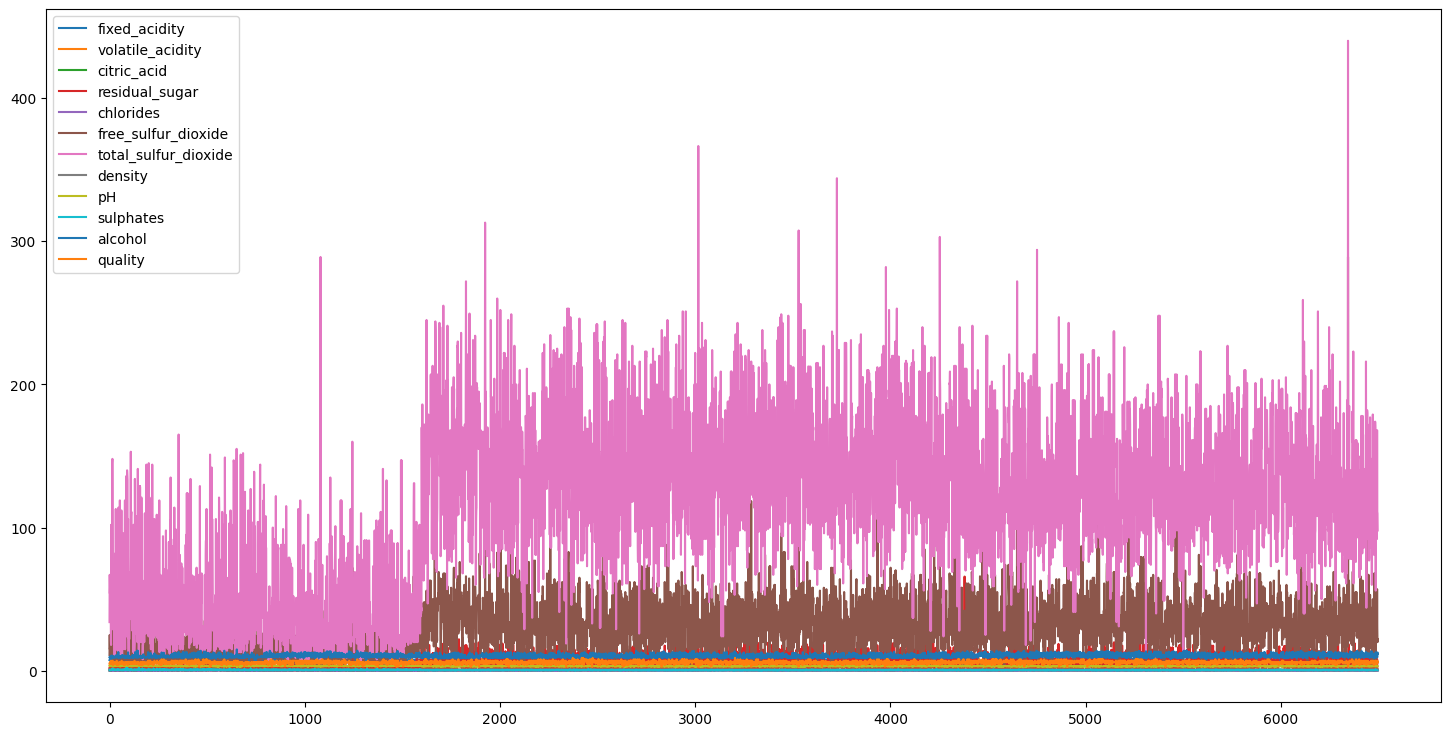

In [ ]:
# Get key statistics
df.describe().round(3)

In [48]:
# Check data entries and data types
df.info()
print("\n")
non_numeric_quality = df[~df['quality'].apply(lambda x: isinstance(x, (int, float)))]
print(non_numeric_quality)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Empty DataFrame
Columns: [fixed_acidity, volatile_acidity, ci

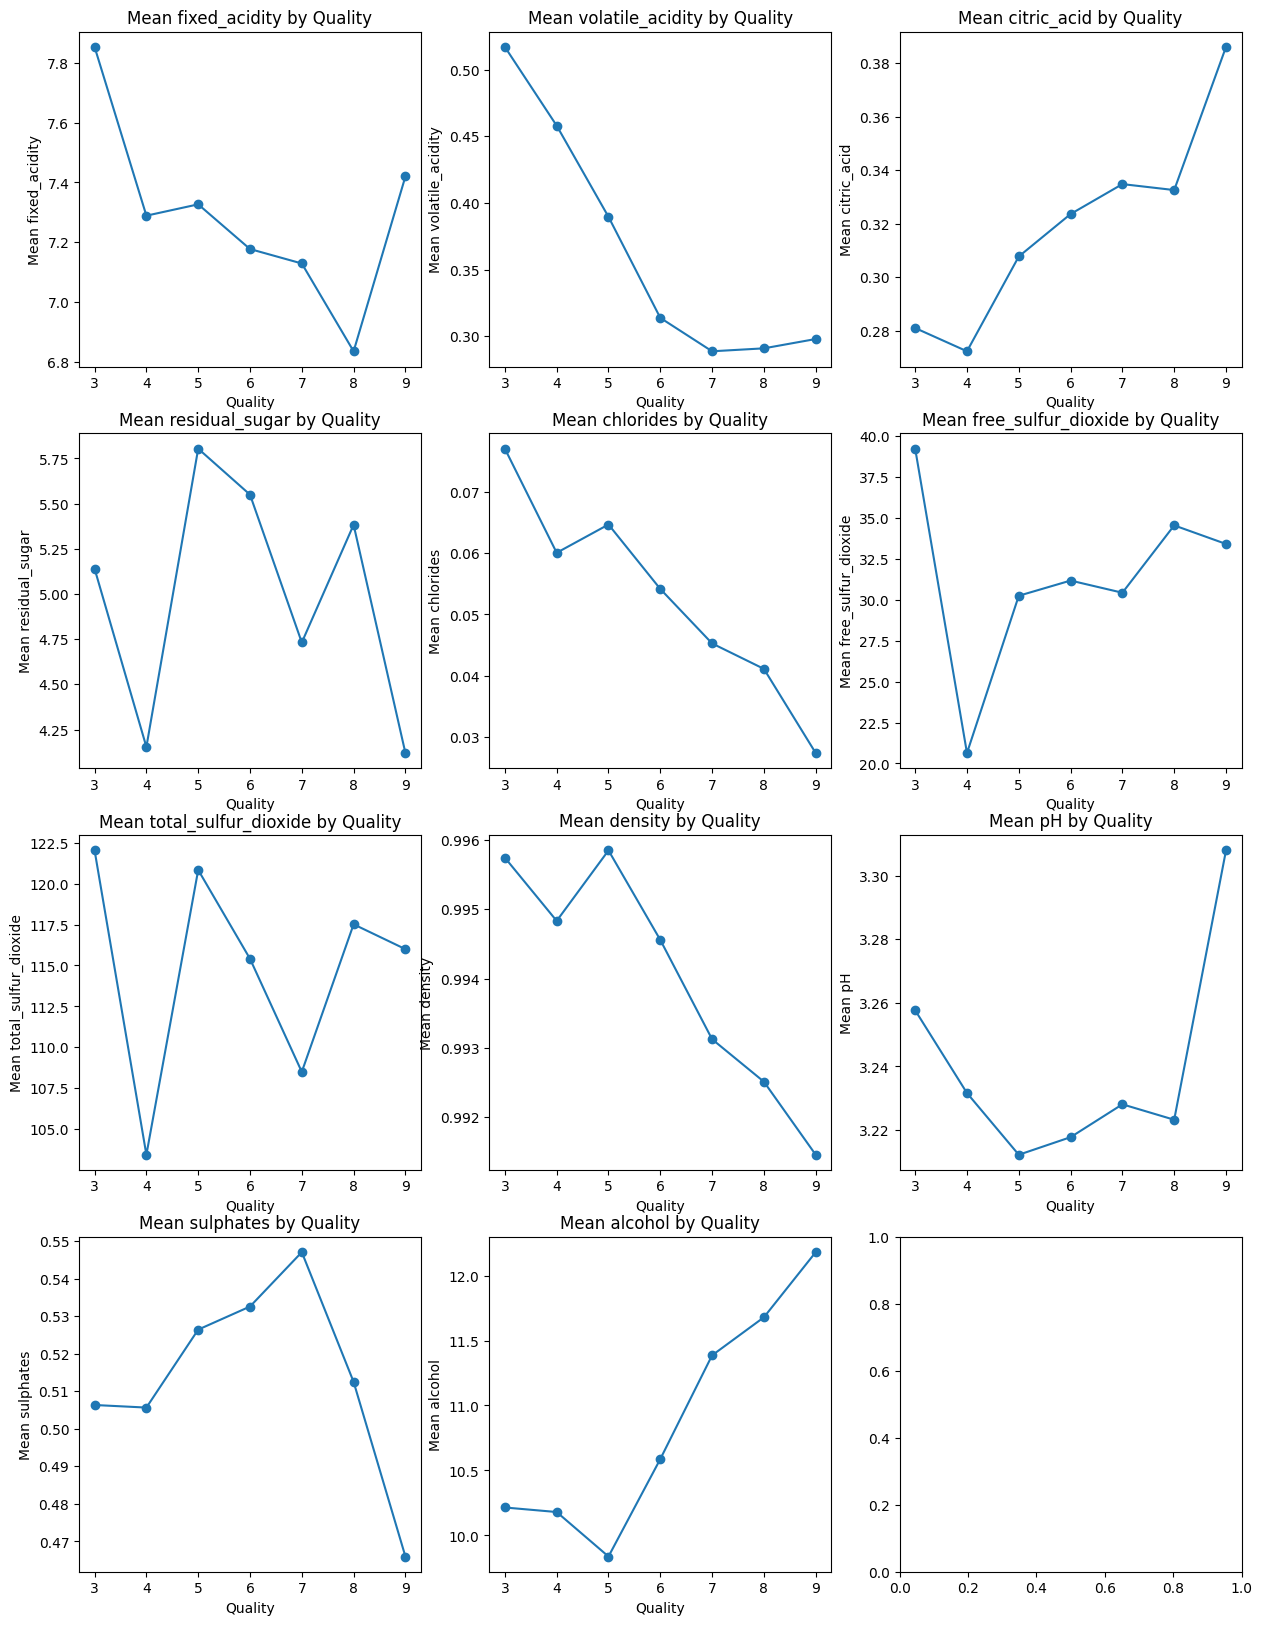

In [ ]:
# Groupby the 'quality' column and calculate the mean of all other columns excluding non-numeric columns (color)

import matplotlib.pyplot as plt
import numpy as np

predictors = []
for col in df.columns:
    if col != "quality" and col != "color":
        predictors.append(col)

# Create graphs
fig, axes = plt.subplots(4, 3, figsize=(15, 5 * 4))
axes = axes.flatten()

for i, col in enumerate(predictors):
    mean_quality = df.groupby("quality")[col].mean(numeric_only=True)
    axes[i].plot(mean_quality.index, mean_quality.values, marker='o')
    axes[i].set_title(f"Mean {col} by Quality")
    axes[i].set_xlabel("Quality")
    axes[i].set_ylabel(f"Mean {col}")

plt.show()

In [59]:
X = wine_quality.data.features 
y = wine_quality.data.targets 

### Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.17      0.29         6
           4       0.00      0.00      0.00        43
           5       0.54      0.61      0.57       402
           6       0.54      0.68      0.60       597
           7       0.50      0.20      0.29       215
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.54      1300
   macro avg       0.37      0.24      0.25      1300
weighted avg       0.50      0.54      0.50      1300



c:\Users\kyle1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kyle1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kyle1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

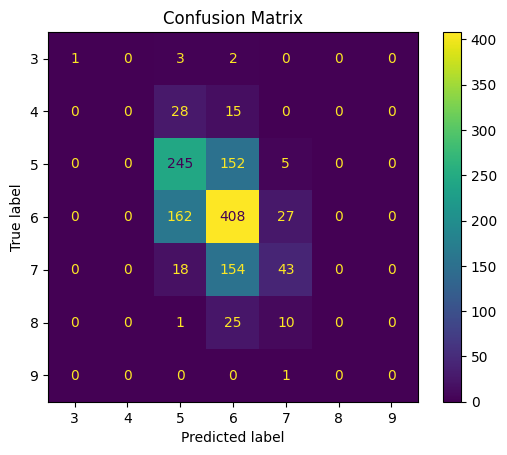

c:\Users\kyle1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           3       1.00      0.17      0.29         6
           4       0.00      0.00      0.00        43
           5       0.54      0.61      0.57       402
           6       0.54      0.68      0.60       597
           7       0.50      0.20      0.29       215
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.54      1300
   macro avg       0.37      0.24      0.25      1300
weighted avg       0.50      0.54      0.50      1300



c:\Users\kyle1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kyle1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [60]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#Scale predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y.values.ravel(),test_size=0.2,random_state=42)

#Fit the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

#Predict on the test set
y_pred = log_reg.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

#Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_test, y_pred))


### Linear Regression

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     201.3
Date:                Tue, 25 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:33:03   Log-Likelihood:                -5765.5
No. Observations:                5197   AIC:                         1.155e+04
Df Residuals:                    5185   BIC:                         1.163e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   59.4198 

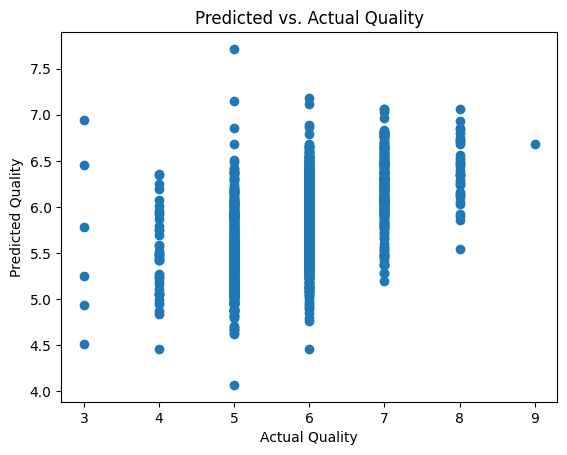

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Split data into test and training sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


X_train_sm = sm.add_constant(X_train_raw)

# Fit OLS model using training data
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

# Remove insignificant variables
p_values = ols_model.pvalues
significant_vars = p_values[p_values < 0.05].index
print("\nSignificant variables (p < 0.05):")
print(significant_vars)

sv = [var for var in significant_vars if var != 'const']

X_train_reduced = X_train_raw[sv]
X_test_reduced = X_test_raw[sv]

# Create a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_reduced, y_train)

# Predict test data based on model
y_pred = lin_reg.predict(X_test_reduced)
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error:", mse)

#Plot accuracy
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted vs. Actual Quality')
plt.show()